In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
%matplotlib inline

In [2]:
# radimo sa podacima koji se ticu bejzbol igraca 
# hteli bismo na osnovu svih statistika o performansama igraca da predvidimo odgovarajucu platu igraca
# podaci koji se koriste su preuzeti iz knjige Introduction to Statisctical Learning 
# link do knjige je: http://www-bcf.usc.edu/~gareth/ISL/
data = pd.read_csv('hitters.csv')

In [5]:
# skup sadrzi 21 atribut (ukljucujuci i platu koju zelimo da predvidimo) 
# i 322 informacije koje se ticu pojedinacnih igraca
data.shape

(322, 21)

In [5]:
data.head(5)

Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits    ...      CRuns  CRBI  CWalks  League Division PutOuts  Assists  \
0     66    ...         30    29      14       A        E     446       33   
1    835    ...        321   414     375       N        W     632       43   
2    457    ...        224   266     263       A        W     880       82   
3   1575    ...        828   838     354       N        E     200       11   
4    101    ...         48    46      33       N        E     805       40   

   Errors  Salary  NewLeague  
0      20     NaN          A  
1      10   475.0          N  
2      14   480.0          A  
3       3   500.0          N  
4       4    91.5          N  

[5 rows x 21 columns]

In [4]:
# ispitujemo prirodu podataka koji se nalaze u tabeli
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [6]:
# neke od vrsta zadrze nedostajuce vrednosti tako da nam nisu podesne u modelovanju
data = data.dropna()

In [7]:
data.shape

(263, 21)

In [8]:
# informacije o platama su nam potrebne za predvidjanje kao posebna velicina 
Y = data['Salary']

In [9]:
# neki atributi nam nisu informativni - kategorickog su tipa, a ne numerickog tipa pa ih treba eliminisati
# to su Player, League, Division, NewLeague
# Salary takodje treba ukloniti
X = data.drop(['Player', 'League', 'Division', 'NewLeague', 'Salary'], axis=1)

In [10]:
X.shape

(263, 16)

In [11]:
# posto su skale vrednosti podataka neujednacene, ima smisla raditi normalizaciju podataka

In [13]:
# delimo skup podataka na:
# trening skup
# validacioni skup koji koristimo za ucenje metaparametara
# test skup na kojem ocenjujemo uspesnost modela

X_train_validation, X_test, Y_train_validation, Y_test = model_selection.train_test_split(X, Y, random_state=1, test_size=0.33)
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train_validation, Y_train_validation, random_state=1, test_size=0.33)

In [15]:
# baseline - linearna regresija
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train_validation, Y_train_validation)
Y_predicted = linreg.predict(X_test)
linreg_score = metrics.mean_squared_error(Y_test, Y_predicted)
linreg_score

138551.12033732753

In [26]:
# grebena regresija sa metaparametrom 4
reg_1= linear_model.Ridge(alpha=4, normalize=True)
reg_1.fit(X_train_validation, Y_train_validation)
Y_predicted = reg_1.predict(X_test)
reg_score_1 = metrics.mean_squared_error(Y_test, Y_predicted)
reg_score_1
# na osnovu ovog rezultata zakljucujemo da ima smisla raditi regularizaciju jer smo dobili manju gresku

126928.00669545057

In [27]:
# grebena regresija sa metaparametrom 10^10
reg_2= linear_model.Ridge(alpha=10**10, normalize=True)
reg_2.fit(X_train_validation, Y_train_validation)
Y_predicted = reg_2.predict(X_test)
reg_score_2 = metrics.mean_squared_error(Y_test, Y_predicted)
reg_score_2
# na osnovu ovog rezultata zakljucujemo da ima smisla odrediti i precizno vrednost parametra alfa 
# jer ocigledno nisu sve regularizacije dobre

194839.49321934962

In [28]:
# skup vrednosti iz kojeg trazimo najbolju vrednost za parametar alfa 
# imamo i male i velike vrednosti u skupu
alphas = 10**np.linspace(10, -2, 100)*0.5

In [23]:
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [31]:
# niz gresaka nasih modela
errors = []

In [32]:
# izracunavamo gresku za skvaku vrednost metaparametra alfa
for a in alphas:
    reg = linear_model.Ridge(normalize=True,  alpha=a)
    reg.fit(X_train, Y_train)
    Y_predicted = reg.predict(X_validation)
    error = metrics.mean_squared_error(Y_predicted, Y_validation)
    errors.append(error)

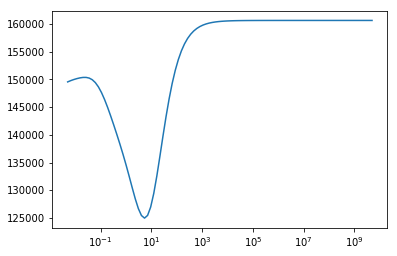

In [34]:
# iscrtavamo zavisnost greske od vrednosti metaparametra alfa
plt.plot(alphas, errors)
plt.xscale('log')

In [36]:
# trazimo koja je to vrednost

In [37]:
type(errors)

list

In [38]:
erros = np.array(errors)


In [39]:
erros.argmin()

74

In [41]:
alpha = alphas[74]
alpha

5.3613361100516048

In [42]:
# greska modela 
errors[74]

124988.07405877969

In [43]:
# sada kada znamo najbolju vrednost metaparametra alfa mozemo da naucimo finalni model i 
# da damo konacnu procenu greske 
# ne zaboraviti da se u ovom koraku koriste i trening i validacioni skup

regfin = linear_model.Ridge(alpha=5.361, normalize=True)
regfin.fit(X_train_validation, Y_train_validation)
Y_predicted = regfin.predict(X_test)
regfin_score = metrics.mean_squared_error(Y_test, Y_predicted)
regfin_score

131350.87475923021